### Loading the features that were created in preprocessing.py

In [1]:
import pandas as pd

test_df = pd.read_csv('INSHEP_features.csv')

In [2]:
test_df

,file_id,activity,path,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width
0,1P36A01R01,walking,datasets\1 December 2017 Dataset\1P36A01R01.dat,9.109772,2.670044e+07,1.046785e+17,3.235406e+08,0.905172,0.000609,505.325148,0.086146,0.998509,8.579986e+07,0.849967,-0.047759,2.068966
1,1P36A01R02,walking,datasets\1 December 2017 Dataset\1P36A01R02.dat,9.025276,1.959870e+07,6.906348e+16,2.627993e+08,1.099138,0.000520,721.726235,0.113271,0.994416,7.179115e+07,1.530323,0.279423,0.258621
2,1P36A01R03,walking,datasets\1 December 2017 Dataset\1P36A01R03.dat,8.914113,1.945387e+07,7.617443e+16,2.759972e+08,0.969828,0.000692,700.990139,0.163762,0.998437,6.483077e+07,2.064459,0.364250,0.193966
3,1P37A01R01,walking,datasets\1 December 2017 Dataset\1P37A01R01.dat,9.233686,2.366216e+07,6.903489e+16,2.627449e+08,0.678879,0.001052,370.189518,0.138266,0.997499,9.769160e+07,0.749244,-0.113842,0.226293
4,1P37A01R02,walking,datasets\1 December 2017 Dataset\1P37A01R02.dat,9.187234,2.411605e+07,7.596749e+16,2.756220e+08,0.840517,0.000945,389.177448,0.133881,0.997439,1.239555e+08,0.917316,-0.039091,1.907328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,5P55A05R1,drink_water,datasets\7 March 2019 West Cumbria Dataset\5P5...,8.101037,9.080083e+05,1.553625e+14,1.246445e+07,0.129310,0.000696,586.640206,0.160467,0.996788,3.590441e+07,0.990091,-0.008572,0.420259
1779,5P55A05R3,drink_water,datasets\7 March 2019 West Cumbria Dataset\5P5...,8.041883,9.940976e+05,1.895267e+14,1.376687e+07,-0.193966,0.000572,528.732149,0.168632,0.996483,3.984330e+07,1.403761,0.040513,0.387931
1780,5P56A05R1,drink_water,datasets\7 March 2019 West Cumbria Dataset\5P5...,7.231323,2.052530e+06,1.951923e+15,4.418057e+07,0.161638,0.000533,1119.092028,0.156458,0.997134,8.719889e+07,1.275885,0.032924,0.420259
1781,5P56A05R2,drink_water,datasets\7 March 2019 West Cumbria Dataset\5P5...,7.295752,1.713943e+06,1.355906e+15,3.682262e+07,0.193966,0.000288,1515.745649,0.166024,0.995440,6.577793e+07,1.193892,0.027241,0.484914


### Mapping the labels to numbers

In [3]:
# Drop unwanted columns
test_df = test_df.drop(columns=['file_id', 'path'])

# Define the mapping
ACTIVITY_MAP = {
    "walking": 1,
    "sitting_down": 2,
    "standing_up": 3,
    "pick_object": 4,
    "drink_water": 5,
    "fall": 6,
}

# Map string labels to numeric codes
test_df['activity'] = test_df['activity'].map(ACTIVITY_MAP)

# Display the first few rows
test_df.head()


,activity,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width
0,1,9.109772,2.670044e+07,1.046785e+17,3.235406e+08,0.905172,0.000609,505.325148,0.086146,0.998509,8.579986e+07,0.849967,-0.047759,2.068966
1,1,9.025276,1.959870e+07,6.906348e+16,2.627993e+08,1.099138,0.000520,721.726235,0.113271,0.994416,7.179115e+07,1.530323,0.279423,0.258621
2,1,8.914113,1.945387e+07,7.617443e+16,2.759972e+08,0.969828,0.000692,700.990139,0.163762,0.998437,6.483077e+07,2.064459,0.364250,0.193966
3,1,9.233686,2.366216e+07,6.903489e+16,2.627449e+08,0.678879,0.001052,370.189518,0.138266,0.997499,9.769160e+07,0.749244,-0.113842,0.226293
4,1,9.187234,2.411605e+07,7.596749e+16,2.756220e+08,0.840517,0.000945,389.177448,0.133881,0.997439,1.239555e+08,0.917316,-0.039091,1.907328


### Splitting in train, test and validation set

In [4]:
#train test split with equal distribution of activity classes
from sklearn.model_selection import train_test_split
X = test_df.drop(columns=['activity'])
y = test_df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#split in validation and train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


# Display the shapes of the train and test sets
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")
# Save the train and test sets to csv files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Train set shape: (1140, 13), Test set shape: (357, 13)


# Training

### Classifying using RF classifier

In [6]:
#train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=ACTIVITY_MAP.keys()))

Test set accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

     walking       0.96      0.97      0.96        68
sitting_down       0.95      0.98      0.97        63
 standing_up       0.92      0.95      0.94        62
 pick_object       0.75      0.71      0.73        62
 drink_water       0.77      0.77      0.77        62
        fall       0.97      0.93      0.95        40

    accuracy                           0.89       357
   macro avg       0.89      0.89      0.89       357
weighted avg       0.88      0.89      0.88       357



### Plotting the feature importance

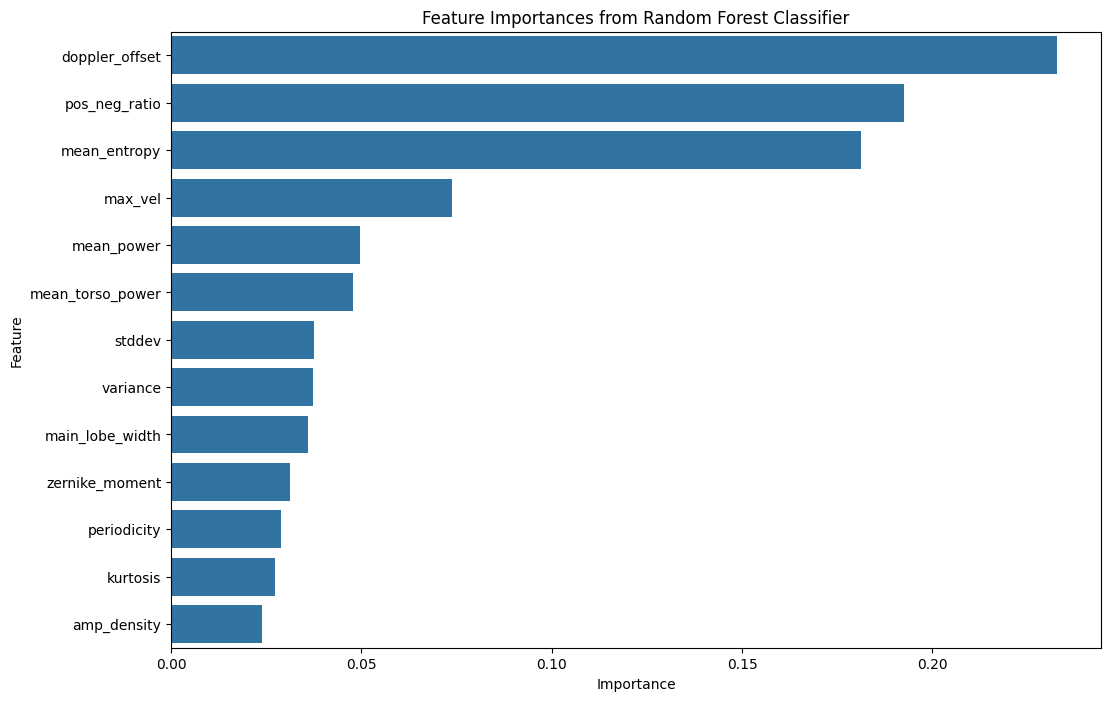

In [ ]:
#plot feature importances

import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Using LGBM classifier

In [ ]:
#use lightgbm
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_lgb = lgb_clf.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Test set accuracy: {accuracy_lgb:.2f}")

c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Het systeem kan het opgegeven bestand niet vinden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2922
[LightGBM] [Info] Number of data points in the train set: 1140, number of used features: 13
[LightGBM] [Info] Start training from score -1.654288
[LightGBM] [Info] Start training from score -1.745479
[LightGBM] [Info] Start training from score -1.745479
[LightGBM] [Info] Start training from score -1.745479
[LightGBM] [Info] Start training from score -1.750517
[LightGBM] [Info] Start training from score -2.194596
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### Standardizing the data for MLP

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Train the Random Forest Classifier on scaled data
rf_clf_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test set
y_pred_scaled = rf_clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled Test set accuracy: {accuracy_scaled:.2f}")

Scaled Test set accuracy: 0.88


### Doing PCA to reduce the number of features

In [ ]:
#perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=13)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Train the Random Forest Classifier on PCA transformed data
X_val_pca = pca.transform(X_val_scaled)


In [ ]:
#multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# Create a Multi-layer Perceptron Classifier and evaluate on validation set
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, verbose = True)
mlp_classifier.fit(X_train_pca, y_train)
# Evaluate the model on the validation set
# mlp_val_score = mlp_classifier.score(X_val, y_val)
# print(f'MLP Validation Score: {mlp_val_score:.4f}')

#test score
mlp_test_score = mlp_classifier.score(X_test_pca, y_test)
print(f'MLP Test Score: {mlp_test_score:.4f}')

Iteration 1, loss = 1.73060725
Iteration 2, loss = 1.55618315
Iteration 3, loss = 1.41608524
Iteration 4, loss = 1.29783183
Iteration 5, loss = 1.19305073
Iteration 6, loss = 1.09449848
Iteration 7, loss = 1.00302998
Iteration 8, loss = 0.91795271
Iteration 9, loss = 0.84115718
Iteration 10, loss = 0.77118649
Iteration 11, loss = 0.71265651
Iteration 12, loss = 0.66161528
Iteration 13, loss = 0.61867867
Iteration 14, loss = 0.58247583
Iteration 15, loss = 0.55173580
Iteration 16, loss = 0.52495345
Iteration 17, loss = 0.50254422
Iteration 18, loss = 0.48340263
Iteration 19, loss = 0.46559521
Iteration 20, loss = 0.45174758
Iteration 21, loss = 0.43949911
Iteration 22, loss = 0.42646132
Iteration 23, loss = 0.41576536
Iteration 24, loss = 0.40514443
Iteration 25, loss = 0.39737138
Iteration 26, loss = 0.38972241
Iteration 27, loss = 0.38403705
Iteration 28, loss = 0.37595577
Iteration 29, loss = 0.37066233
Iteration 30, loss = 0.36510805
Iteration 31, loss = 0.36056135
Iteration 32, los

c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluation of MLP

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8851540616246498


### Custom Neural network Using Torch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd # Assuming X_train_pca is a pandas DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Encode labels to start from 0 using LabelEncoder
le = LabelEncoder()
# Fit on all unique labels across all sets to ensure consistency
le.fit(np.unique(np.concatenate([y_train, y_val, y_test])))

# Transform all label sets
y_train_tensor = torch.tensor(le.transform(y_train), dtype=torch.long)
y_val_tensor = torch.tensor(le.transform(y_val), dtype=torch.long)
y_test_tensor = torch.tensor(le.transform(y_test), dtype=torch.long)

# Define number of classes
num_classes = len(le.classes_)

# Debug: Check label ranges
print("Unique values in y_train_tensor:", torch.unique(y_train_tensor))
print("Unique values in y_val_tensor:", torch.unique(y_val_tensor))
print("Unique values in y_test_tensor:", torch.unique(y_test_tensor))
print("num_classes:", num_classes)

# Assertions for label range (already present, good practice)
assert torch.all(y_train_tensor >= 0) and torch.all(y_train_tensor < num_classes), \
    f"y_train_tensor has out-of-range labels. Min: {y_train_tensor.min()}, Max: {y_train_tensor.max()}, Expected range [0, {num_classes-1}]"
assert torch.all(y_val_tensor >= 0) and torch.all(y_val_tensor < num_classes), \
    f"y_val_tensor has out-of-range labels. Min: {y_val_tensor.min()}, Max: {y_val_tensor.max()}, Expected range [0, {num_classes-1}]"
assert torch.all(y_test_tensor >= 0) and torch.all(y_test_tensor < num_classes), \
    f"y_test_tensor has out-of-range labels. Min: {y_test_tensor.min()}, Max: {y_test_tensor.max()}, Expected range [0, {num_classes-1}]"


# Convert PCA features to PyTorch tensors
# Use directly since X_train_pca, X_val_pca, X_test_pca are numpy arrays
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)

# Check for NaNs/Infs in input tensors
print("X_train_tensor has NaNs:", torch.isnan(X_train_tensor).any())
print("X_train_tensor has Infs:", torch.isinf(X_train_tensor).any())
print("X_val_tensor has NaNs:", torch.isnan(X_val_tensor).any())
print("X_val_tensor has Infs:", torch.isinf(X_val_tensor).any())
print("X_test_tensor has NaNs:", torch.isnan(X_test_tensor).any())
print("X_test_tensor has Infs:", torch.isinf(X_test_tensor).any())


# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x) # No activation here, as CrossEntropyLoss expects logits
        return x

# Initialize model, loss function, and optimizer
input_size = X_train_pca.shape[1]
model = SimpleNN(input_size, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop with early stopping
num_epochs = 5000
patience = 200
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path = 'best_model.pth' # Define path for saving best model

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), best_model_path)  # Save best model
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("Early stopping triggered")
        break

# Load best model for evaluation
print(f"Loading best model from {best_model_path}")
model.load_state_dict(torch.load(best_model_path))

# Evaluate on the test set
model.eval()
test_loss = 0.0
test_correct = 0
with torch.no_grad():
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()

test_loss /= len(X_test_tensor)
test_accuracy = test_correct / len(X_test_tensor)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Save final model (optional, often you'd just use the best_model.pth for deployment)
final_model_path = 'final_model.pth'
torch.save(model.state_dict(), final_model_path)
print(f"Final model state saved to {final_model_path}")

# Load model for inference (example)
# loaded_model = SimpleNN(input_size, num_classes)
# loaded_model.load_state_dict(torch.load('final_model.pth'))
# loaded_model.to(device) # Don't forget to move it to device if you want to use it on GPU
# loaded_model.eval()

Unique values in y_train_tensor: tensor([0, 1, 2, 3, 4, 5])
Unique values in y_val_tensor: tensor([0, 1, 2, 3, 4, 5])
Unique values in y_test_tensor: tensor([0, 1, 2, 3, 4, 5])
num_classes: 6
X_train_tensor has NaNs: tensor(False)
X_train_tensor has Infs: tensor(False)
X_val_tensor has NaNs: tensor(False)
X_val_tensor has Infs: tensor(False)
X_test_tensor has NaNs: tensor(False)
X_test_tensor has Infs: tensor(False)
Using device: cuda
Epoch [1/5000], Loss: 1.2994, Val Loss: 0.6750
Epoch [2/5000], Loss: 0.8710, Val Loss: 0.5391
Epoch [3/5000], Loss: 0.7168, Val Loss: 0.4843
Epoch [4/5000], Loss: 0.6810, Val Loss: 0.4938
Epoch [5/5000], Loss: 0.6657, Val Loss: 0.4614
Epoch [6/5000], Loss: 0.6576, Val Loss: 0.4393
Epoch [7/5000], Loss: 0.6262, Val Loss: 0.4508
Epoch [8/5000], Loss: 0.6062, Val Loss: 0.4249
Epoch [9/5000], Loss: 0.6112, Val Loss: 0.4215
Epoch [10/5000], Loss: 0.5873, Val Loss: 0.4054
Epoch [11/5000], Loss: 0.5794, Val Loss: 0.4291
Epoch [12/5000], Loss: 0.5512, Val Loss: 0

C:\Users\Adnane\AppData\Local\Temp\ipykernel_17064\4116019938.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))
